In [1]:
import tensorflow as tf
import os
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [2]:
train_datagen = ImageDataGenerator(rescale=1./255, # normallize
                                   shear_range= 0.2, #Augmentation
                                   zoom_range=0.2,
                                   horizontal_flip=True)

training_set = train_datagen.flow_from_directory('Medical Images/Covid/Covid/X-ray',
                                                 target_size=(64,64),
                                                 batch_size=32,
                                                 class_mode='binary')          


Found 10829 images belonging to 2 classes.


In [3]:
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(64, 64, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))  # 'sigmoid' for binary classification

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [4]:
history = model.fit(training_set, epochs=8, steps_per_epoch=len(training_set),batch_size=16)
history


Epoch 1/8
339/339 [==============================] - 92s 271ms/step - loss: 0.1546 - accuracy: 0.9435
Epoch 2/8
339/339 [==============================] - 89s 263ms/step - loss: 0.1094 - accuracy: 0.9626
Epoch 3/8
339/339 [==============================] - 89s 263ms/step - loss: 0.0763 - accuracy: 0.9739
Epoch 4/8
339/339 [==============================] - 92s 272ms/step - loss: 0.0662 - accuracy: 0.9774
Epoch 5/8
339/339 [==============================] - 92s 271ms/step - loss: 0.0641 - accuracy: 0.9768
Epoch 6/8
339/339 [==============================] - 96s 283ms/step - loss: 0.0530 - accuracy: 0.9806
Epoch 7/8
339/339 [==============================] - 94s 279ms/step - loss: 0.0498 - accuracy: 0.9839
Epoch 8/8
339/339 [==============================] - 93s 275ms/step - loss: 0.0480 - accuracy: 0.9847


In [7]:
from tensorflow.keras.preprocessing import image
import numpy as np

test_image = image.load_img('Medical Images/Covid/Covid/X-ray/Disease/01.jpeg', target_size=(64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
result = model.predict(test_image)

if result[0][0] == 1:
    prediction = 'disease'
else:
    prediction = 'healthy'

print(prediction)

## try and find a way to make it run faster, maybe dask or parallelize, mine took more than 10 minus 
## start looking into other models and test them (other than sequential or beyond CNN) 

1/1 [==============================] - 0s 9ms/step
disease


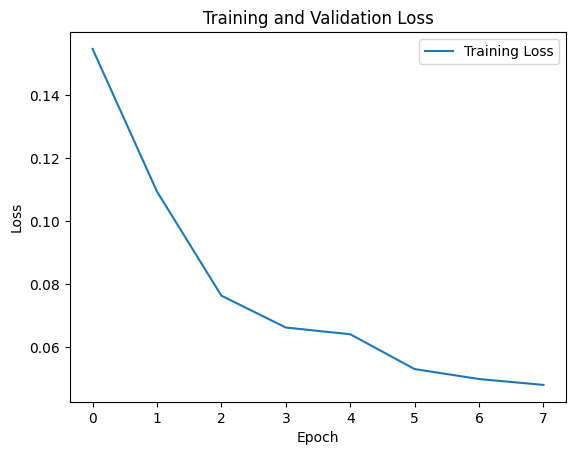

In [8]:
plt.plot(history.history['loss'], label='Training Loss')
## plt.plot(history.history['val_loss'], label='Validation Loss') dont have validation set when model runs ?
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()